In [15]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist #Images of Handwritten numbers 28x28

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) #Probability distribution

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 7s 119us/sample - loss: 0.2615 - acc: 0.9234
Epoch 2/3
60000/60000 [==============================] - 7s 116us/sample - loss: 0.1085 - acc: 0.9664s - loss
Epoch 3/3
60000/60000 [==============================] - 7s 117us/sample - loss: 0.0741 - acc: 0.9767


In [16]:
val_loss, val_acc = model.evaluate(x_test, y_test) #Checking for overfitting
print(val_loss)
print(val_acc)

10000/10000 [==============================] - 1s 52us/sample - loss: 0.1036 - acc: 0.9681
0.10355427320497111
0.9681


In [17]:
model.save('epic_num_reader.model')


In [18]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

In [19]:
predictions = new_model.predict(x_test)

In [24]:
import numpy as np #

print(np.argmax(predictions[7]))

9


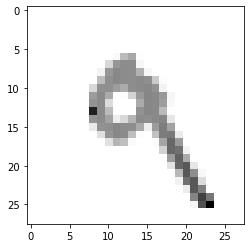

In [25]:
plt.imshow(x_test[7],cmap=plt.cm.binary)
plt.show()